In [1]:
import pandas as pd
import  seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import timedelta, datetime
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture


In [2]:
from sklearn.metrics import silhouette_score

In [3]:
from sklearn.mixture import GaussianMixture


https://www.ritchievink.com/blog/2018/06/05/clustering-data-with-dirichlet-mixtures-in-edward-and-pymc3/

In [4]:
df=pd.read_csv('prereq_edges.csv')

In [5]:
df.columns

Index(['source_lo_id', 'dest_lo_id', 'source_lo_title', 'dest_lo_title'], dtype='object')

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
G=nx.Graph()

for _,i in df.iterrows():    
       
        G.add_edge(i['source_lo_title'],i['dest_lo_title'])
       

In [8]:
subgraphs=[G.subgraph(i) for i in nx.connected_components(G)]

In [9]:
for num,sub in enumerate(subgraphs):
    
    nx.set_node_attributes(sub,num,'subGraphId')

In [10]:
nodeSubGraphId={}
for g in subgraphs:
    for node in g.nodes(data=True):
         nodeSubGraphId[node[0]]= node[1]['subGraphId']

In [11]:
subgraphsNodeCountDict={ num: g.number_of_nodes() for num,g in  enumerate(subgraphs)}

In [12]:
df2=pd.read_pickle('appmath.pkl')

In [13]:


for col in df2.columns:
    if df2[col].dtype.name=='category':
        df2[col]=df2[col].astype(str)

In [14]:
df2.head()

graph_id  \
2739785  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1971810  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1518532  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
2063269  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
2928085  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   

                                    course_id  \
2739785  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
1971810  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
1518532  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
2063269  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
2928085  689c9d2c-b88e-40f1-9e5a-3a7193161cac   

                                   section_id  \
2739785  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
1971810  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
1518532  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
2063269  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
2928085  2dfdde50-72c3-4d49-8840-f0de82fedd0a   

                                      user_id  \
2739785  0012ff2b-871a-45d6-8e33-804f7464fa0a   
1971810  0012ff2b-871a-45d6-8e33-804f7464fa0a   
1518532  0012ff2b-871a-45d6-8e33-804f7464fa0a   
2063269  0012ff2b-871a-45d6-8e33-804f7464fa0a   
2928085  0012ff2b-871a-45d6-8e33-804f7464fa0a   

                              registration_id  \
2739785  0bbde3de-283b-4b08-a783-1a2942d07a2e   
1971810  0bbde3de-283b-4b08-a783-1a2942d07a2e   
1518532  0bbde3de-283b-4b08-a783-1a2942d07a2e   
2063269  630b3513-7534-4ebc-8fe6-4625ad5ae796   
2928085  630b3513-7534-4ebc-8fe6-4625ad5ae796   

                                      goal_id  \
2739785  e359efc4-ed49-4227-a03e-c0c9358487d3   
1971810  e359efc4-ed49-4227-a03e-c0c9358487d3   
1518532  e359efc4-ed49-4227-a03e-c0c9358487d3   
2063269  4debeb6d-fc33-46ad-a19b-307c7ae270d0   
2928085  4debeb6d-fc33-46ad-a19b-307c7ae270d0   

                                      path_id path_type adaptive_behavior  \
2739785  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
1971810  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
1518532  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
2063269  0e2c0048-8974-4e02-93ce-443075bb7087  ADAPTIVE          PRACTICE   
2928085  0e2c0048-8974-4e02-93ce-443075bb7087  ADAPTIVE          PRACTICE   

                                     topic_id  lo_to_concept_blacklist  \
2739785  d5743794-1f74-46ca-a538-8bf6c1cbb30b                      NaN   
1971810  d5743794-1f74-46ca-a538-8bf6c1cbb30b                      NaN   
1518532  d5743794-1f74-46ca-a538-8bf6c1cbb30b                      NaN   
2063269  00b67632-3af0-47f7-ac19-77c8c686244b                      NaN   
2928085  00b67632-3af0-47f7-ac19-77c8c686244b                      NaN   

           interaction_end_time                            concept_id  \
2739785 2022-10-02 16:17:07.342  b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe   
1971810 2022-10-02 16:17:42.073  b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe   
1518532 2022-10-02 16:17:42.341  b7d9982e-26f9-47c0-b76f-cc9dc1f0bfbe   
2063269 2022-12-16 18:34:22.470  d02dcdf8-70dd-46db-bd8b-0894f303871d   
2928085 2022-12-16 18:35:06.209  d02dcdf8-70dd-46db-bd8b-0894f303871d   

                           concept_partner_id  \
2739785  53568360-e9fe-465f-a8fc-1c75027cba94   
1971810  53568360-e9fe-465f-a8fc-1c75027cba94   
1518532  53568360-e9fe-465f-a8fc-1c75027cba94   
2063269  e5dfa5f5-7ded-4b39-911e-b2b1737007a1   
2928085  e5dfa5f5-7ded-4b39-911e-b2b1737007a1   

                                              concept_name  \
2739785  Construct a truth table for a conditional stat...   
1971810  Construct a truth table for a conditional stat...   
1518532  Construct a truth table for a conditional stat...   
2063269        Determine the sample space of an experiment   
2928085        Determine the sample space of an experiment   

                                 retail_lo_id  \
2739785  53568360-e9fe-465f-a8fc-1c75027cba94   
1971810  53568360-e9fe-465f-a8fc-1c75027cba94   
1518532  53568360-e9fe-465f-a8fc-1c75027cba94   
2063269  e5dfa5f5-7ded-4b39-911e-b2b1737007a1   
2928085

In [15]:
df2['loGraphID']=df2.learning_objective_name.apply(lambda x: nodeSubGraphId.get(x) )

In [16]:
df2[df2.loGraphID==16].groupby(['goal_id']).user_id.nunique()

goal_id
08c602fc-d3a6-4683-a812-d84b6e53ba74      6
14acf014-9c36-4d5c-b6d5-f629a99521aa    253
17cc7337-218f-47e3-a7cc-fe5dcfaa40c3      4
26f0f342-f789-4f2e-a9da-06b0855bd65f    245
284957b0-918f-42fa-8bd5-0c9f4f7d6f68     83
2a19b235-a85a-42b0-838a-6a944c62e993      9
2d5fe70c-f161-4d3b-801f-98694f50c2e2      6
340c9148-e0d7-4851-9329-3601e55f8c8e      6
406c1d43-c60a-4475-b6c9-1e871e02630c     14
41c68700-3305-4eba-8e08-e43fdbfc513e     29
4d45ebb2-59df-47be-a785-eeda558902bf      1
524ca386-eb1a-4b50-b425-7682ee1ba2ef     72
57b91ad5-ccb5-4406-9b06-601c2ebc8476     54
5f7a117e-cbb0-4853-a36a-486b6dac6833      6
614f2961-8b63-4dd5-8009-905276869277     12
64a03c49-67e5-48ec-9df4-da9a80a06e40     69
6b8f2361-56d4-4bc3-a9c5-1e0601bad266      4
6c73dbb5-da3d-4786-a7fb-a66857ed09be      1
6df46e44-9c15-40f3-bc4a-e23b35776509     78
6f16ca72-8767-4bbe-ade9-b4aaf6b52d86     73
70d5ca9c-2683-4c16-ab16-c86039fecf2e      1
728f1623-729f-4b7d-b42c-9abaeaf1c5ea      3
74ab7516-c224-4428-b848-

In [17]:
tempGoalId='14acf014-9c36-4d5c-b6d5-f629a99521aa'

In [18]:
df2

graph_id  \
2739785  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1971810  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1518532  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
2063269  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
2928085  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
...                                       ...   
293507   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
723858   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
1068851  076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
300133   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   
300130   076e1a0e-669c-40c4-a23c-7ac2bbaa05cf   

                                    course_id  \
2739785  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
1971810  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
1518532  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
2063269  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
2928085  689c9d2c-b88e-40f1-9e5a-3a7193161cac   
...                                       ...   
293507   010d032f-1ba4-450a-98a7-1ef6d0ecffdf   
723858   010d032f-1ba4-450a-98a7-1ef6d0ecffdf   
1068851  010d032f-1ba4-450a-98a7-1ef6d0ecffdf   
300133   010d032f-1ba4-450a-98a7-1ef6d0ecffdf   
300130   010d032f-1ba4-450a-98a7-1ef6d0ecffdf   

                                   section_id  \
2739785  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
1971810  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
1518532  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
2063269  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
2928085  2dfdde50-72c3-4d49-8840-f0de82fedd0a   
...                                       ...   
293507   88011589-0c00-421e-bbb6-43decbae5a60   
723858   88011589-0c00-421e-bbb6-43decbae5a60   
1068851  88011589-0c00-421e-bbb6-43decbae5a60   
300133   88011589-0c00-421e-bbb6-43decbae5a60   
300130   88011589-0c00-421e-bbb6-43decbae5a60   

                                      user_id  \
2739785  0012ff2b-871a-45d6-8e33-804f7464fa0a   
1971810  0012ff2b-871a-45d6-8e33-804f7464fa0a   
1518532  0012ff2b-871a-45d6-8e33-804f7464fa0a   
2063269  0012ff2b-871a-45d6-8e33-804f7464fa0a   
2928085  0012ff2b-871a-45d6-8e33-804f7464fa0a   
...                                       ...   
293507   fff245f4-b76c-4ed3-ae05-84a25bfd92ad   
723858   fff245f4-b76c-4ed3-ae05-84a25bfd92ad   
1068851  fff245f4-b76c-4ed3-ae05-84a25bfd92ad   
300133   fff245f4-b76c-4ed3-ae05-84a25bfd92ad   
300130   fff245f4-b76c-4ed3-ae05-84a25bfd92ad   

                              registration_id  \
2739785  0bbde3de-283b-4b08-a783-1a2942d07a2e   
1971810  0bbde3de-283b-4b08-a783-1a2942d07a2e   
1518532  0bbde3de-283b-4b08-a783-1a2942d07a2e   
2063269  630b3513-7534-4ebc-8fe6-4625ad5ae796   
2928085  630b3513-7534-4ebc-8fe6-4625ad5ae796   
...                                       ...   
293507   8083395f-08de-4c5f-b585-e66d50a8f55c   
723858   8083395f-08de-4c5f-b585-e66d50a8f55c   
1068851  8083395f-08de-4c5f-b585-e66d50a8f55c   
300133   8083395f-08de-4c5f-b585-e66d50a8f55c   
300130   8083395f-08de-4c5f-b585-e66d50a8f55c   

                                      goal_id  \
2739785  e359efc4-ed49-4227-a03e-c0c9358487d3   
1971810  e359efc4-ed49-4227-a03e-c0c9358487d3   
1518532  e359efc4-ed49-4227-a03e-c0c9358487d3   
2063269  4debeb6d-fc33-46ad-a19b-307c7ae270d0   
2928085  4debeb6d-fc33-46ad-a19b-307c7ae270d0   
...                                       ...   
293507   209abe07-67d8-4e6e-857a-7853810efcf5   
723858   209abe07-67d8-4e6e-857a-7853810efcf5   
1068851  209abe07-67d8-4e6e-857a-7853810efcf5   
300133   209abe07-67d8-4e6e-857a-7853810efcf5   
300130   209abe07-67d8-4e6e-857a-7853810efcf5   

                                      path_id path_type adaptive_behavior  \
2739785  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
1971810  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
1518532  009f012a-30c9-42c5-94c6-3e05008ccfd0    REVIEW              None   
2063269  0e2c0048-8974-4e02-93ce-443075bb7087  ADAPTIVE          PRACTICE   
2928085  0e2c0048-8974-4e02-93ce-443075bb7087  ADAPTIVE          PRACTICE   
...                                      

In [19]:
df3=df2.copy()
df3['start_time']=df3.apply(lambda x: x['interaction_end_time']-timedelta(seconds=x['duration_s']),axis=1)

In [27]:
kc16=df3[df3.loGraphID==16][['user_id','learning_objective_name','atom_id','correct','start_time']].reset_index(drop=True)

In [28]:
kc16['atom_type']=kc16.correct.isna().apply(lambda x: 'instructions' if x else 'atom')

In [29]:
kc16.to_csv('test_goal.csv')

In [23]:
goal=df2[df2.goal_id==tempGoalId]
goal['start_time']=goal.apply(lambda x: x['interaction_end_time']-timedelta(seconds=x['duration_s']),axis=1)
goal=goal.sort_values(['user_id','start_time'])

C:\Users\mpathirana\AppData\Local\Temp\ipykernel_47320\846079902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goal['start_time']=goal.apply(lambda x: x['interaction_end_time']-timedelta(seconds=x['duration_s']),axis=1)


In [24]:
goal=goal[~goal.correct.isna()]

In [25]:
goal['row']=goal.groupby(['user_id']).cumcount()


In [26]:
df2=df2[~df2.correct.isna()]

In [27]:
goalNew=df2[(df2.loGraphID==16) & (df2.state=='DONE') ]

In [28]:
goalNewPvt=goalNew.pivot_table(index='user_id',columns='atom_id',values='correct').fillna(-1)

In [29]:
goalNewPvt.to_csv('goalNewPvt.csv')

In [30]:
goalNew.user_id.nunique()

1426

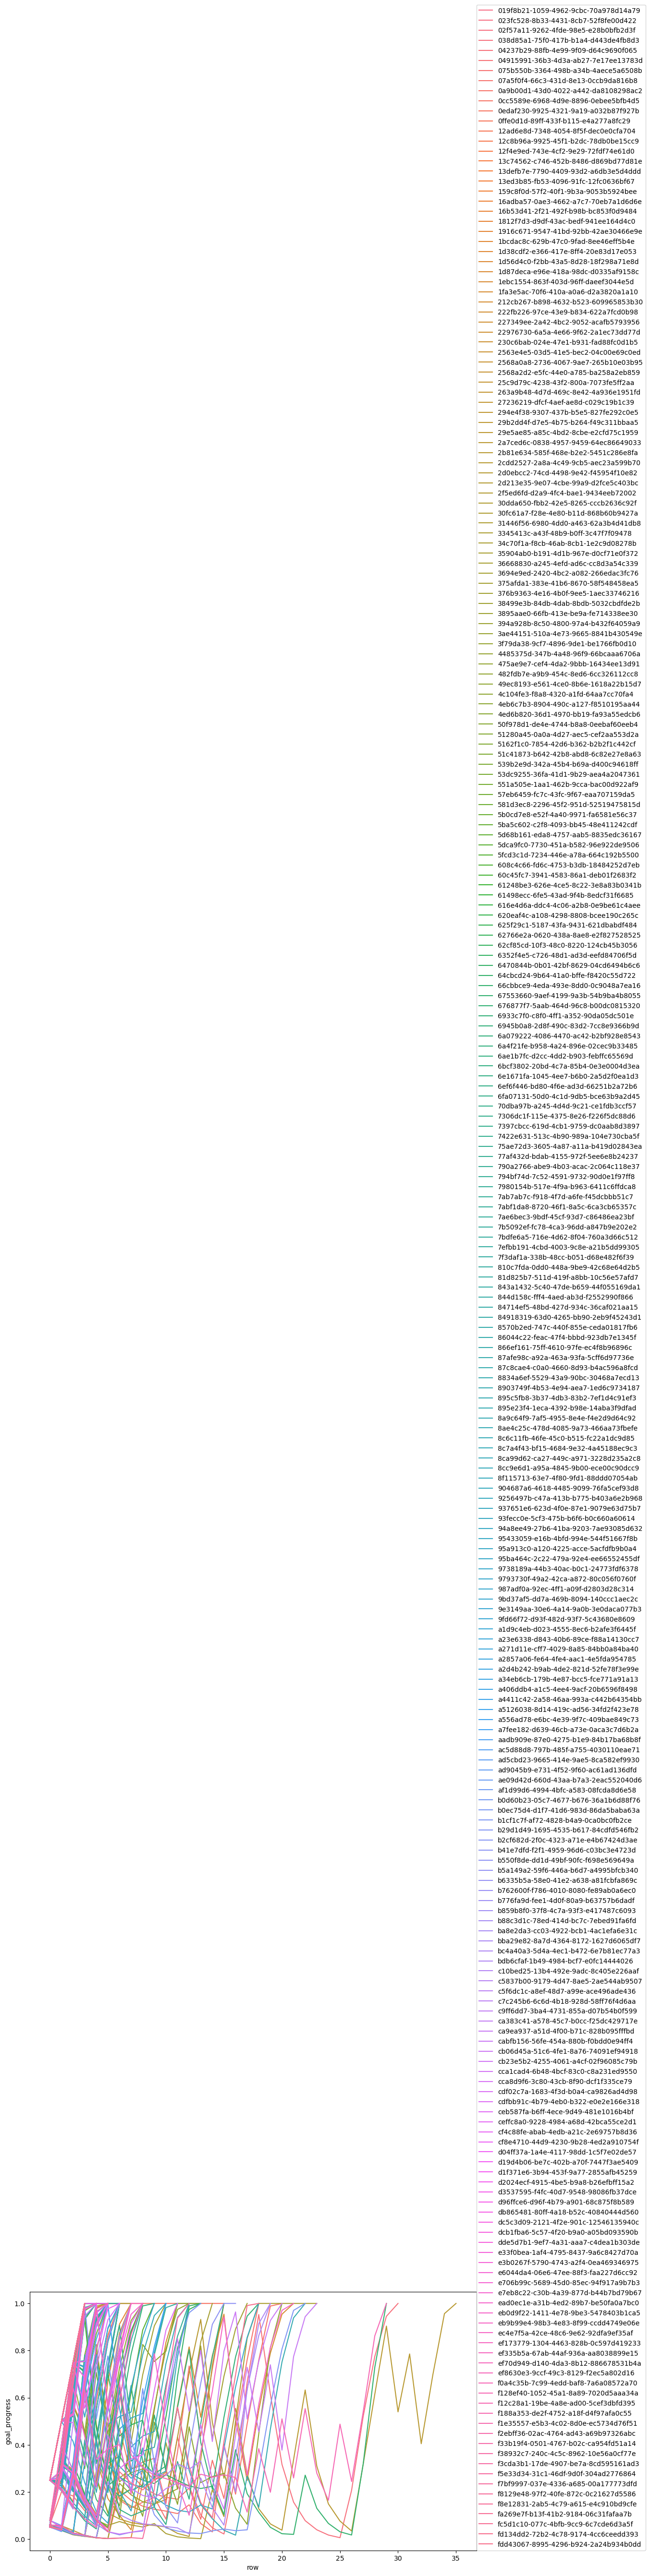

In [31]:
plt.figure(figsize=(12,7))
sns.lineplot(data=goal,x='row',y='goal_progress',hue='user_id')
plt.legend(loc=(1,0))


k=3
l=8
ymax=1
n=goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].row.max()+1
x=np.arange(0,n,1)
fh=[max(0,i) for i in  2*ymax/(1+np.exp(1+(k-x)/l)) -ymax]

st=(goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].goal_progress.std())**.5
mean=np.mean(fh)
fh2=[min(max(0,np.random.normal(i,0.1)),1) for i in  fh]

plt.plot(x,fh,color='r',label='f(h mean) : {0:.2g}'.format(np.mean(fh)))
plt.plot(x,fh2,color='b',label='f(h)')
plt.plot(goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].row,goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].goal_progress,color='g',label='original ,mean : {0:.2g}'.format(goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].goal_progress.mean()))
plt.legend()

In [32]:
#np.cov([fh2,goal[goal.user_id=='001a31f0-5c4c-4e34-8c92-fcb321265f27'].goal_progress.to_list()])

In [33]:
goalprog=goal.pivot_table(index='user_id',columns='row',values='goal_progress')

In [34]:
goalprog2=goalprog.T.ffill().T

In [35]:
len(goalprog2.columns)

36

In [36]:
goalprog2.columns=np.arange(0,len(goalprog2.columns),1)

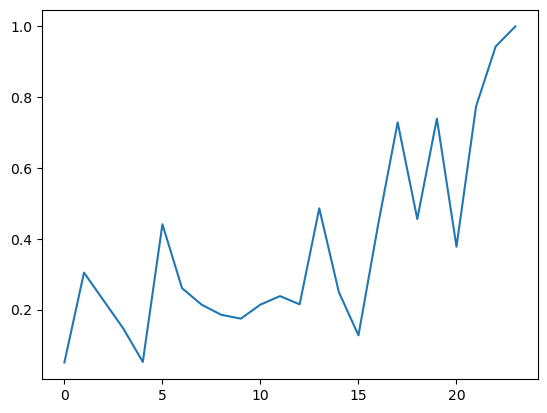

In [37]:
plt.plot(goalprog.iloc[201,:])

In [38]:
goalprog

row                                         0         1         2         3   \
user_id                                                                        
019f8b21-1059-4962-9cbc-70a978d14a79  0.061783  0.339130  0.750000  1.000000   
023fc528-8b33-4431-8cb7-52f8fe00d422  0.250000  0.500000  0.750000  1.000000   
02f57a11-9262-4fde-98e5-e28b0bfb2d3f  0.250000  0.500000  0.750000  1.000000   
038d85a1-75f0-417b-b1a4-d443de4fb8d3  0.053331  0.317057  0.204677  0.132145   
04237b29-88fb-4e99-9f09-d64c9690f065  0.250000  0.500000  0.750000  1.000000   
...                                        ...       ...       ...       ...   
f8e12831-2ab5-4c79-a615-e4c910bd9cfe  0.250000  0.500000  0.750000  1.000000   
fa269e7f-b13f-41b2-9184-06c31fafaa7b  0.050282  0.039018  0.273064  0.657478   
fc5d1c10-077c-4bfb-9cc9-6c7cde6d3a5f  0.050282  0.309929  0.658005  1.000000   
fd134dd2-72b2-4c78-9174-4cc6ceedd393  0.250000  0.500000  0.750000  1.000000   
fdd43067-8995-4296-b924-2a24b934b0dd  0.054074  0.038985  0.270938  0.157661   

row                                         4         5         6         7   \
user_id                                                                        
019f8b21-1059-4962-9cbc-70a978d14a79  1.000000  1.000000       NaN       NaN   
023fc528-8b33-4431-8cb7-52f8fe00d422       NaN       NaN       NaN       NaN   
02f57a11-9262-4fde-98e5-e28b0bfb2d3f       NaN       NaN       NaN       NaN   
038d85a1-75f0-417b-b1a4-d443de4fb8d3  0.076365  0.345103  0.627507  0.296672   
04237b29-88fb-4e99-9f09-d64c9690f065       NaN       NaN       NaN       NaN   
...                                        ...       ...       ...       ...   
f8e12831-2ab5-4c79-a615-e4c910bd9cfe       NaN       NaN       NaN       NaN   
fa269e7f-b13f-41b2-9184-06c31fafaa7b  0.977327  1.000000       NaN       NaN   
fc5d1c10-077c-4bfb-9cc9-6c7cde6d3a5f       NaN       NaN       NaN       NaN   
fd134dd2-72b2-4c78-9174-4cc6ceedd393       NaN       NaN       NaN       NaN   
fdd43067-8995-4296-b924-2a24b934b0dd  0.079130  0.030331  0.285717  0.237976   

row                                         8         9         10        11  \
user_id                                                                        
019f8b21-1059-4962-9cbc-70a978d14a79       NaN       NaN       NaN       NaN   
023fc528-8b33-4431-8cb7-52f8fe00d422       NaN       NaN       NaN       NaN   
02f57a11-9262-4fde-98e5-e28b0bfb2d3f       NaN       NaN       NaN       NaN   
038d85a1-75f0-417b-b1a4-d443de4fb8d3  0.326561  0.342671  0.150558  0.432636   
04237b29-88fb-4e99-9f09-d64c9690f065       NaN       NaN       NaN       NaN   
...                                        ...       ...       ...       ...   
f8e12831-2ab5-4c79-a615-e4c910bd9cfe       NaN       NaN       NaN       NaN   
fa269e7f-b13f-41b2-9184-06c31fafaa7b       NaN       NaN       NaN       NaN   
fc5d1c10-077c-4bfb-9cc9-6c7cde6d3a5f       NaN       NaN       NaN       NaN   
fd134dd2-72b2-4c78-9174-4cc6ceedd393       NaN       NaN       NaN       NaN   
fdd43067-8995-4296-b924-2a24b934b0dd  0.208511  0.250148  0.274292  0.559661   

row                                         12        13        14        15  \
user_id                                                                        
019f8b21-1059-4962-9cbc-70a978d14a79       NaN       NaN       NaN       NaN   
023fc528-8b33-4431-8cb7-52f8fe00d422       NaN       NaN       NaN       NaN   
02f57a11-9262-4fde-98e5-e28b0bfb2d3f       NaN       NaN       NaN       NaN   
038d85a1-75f0-417b-b1a4-d443de4fb8d3  0.224559  0.102123  0.047603  0.021389   
04237b29-88fb-4e99-9f09-d64c9690f065       NaN       NaN       NaN       NaN   
...                                        ...       ...       ...       ...   
f8e12831-2ab5-4c79-a615-e4c910bd9cfe       NaN       NaN       NaN       NaN   
fa269e7f-b13f-41b2-9184-06c31fafaa7b       NaN       NaN       NaN       NaN   
fc5d1c10-077c-4bfb-9cc9-6c7cde6d3a5f       NaN       NaN       NaN       NaN 

In [39]:

empty=[]
arrs =goalprog.iloc[:10,:].values

for arr in  arrs:
    mask = np.isnan(arr)
    arr_no_nan = list(arr[~mask])
    empty.append(arr_no_nan
                )


In [40]:
len([0.05177617, 0.04043189, 0.27665558, 0.16207922, 0.08115584,
       0.03107502, 0.02104149, 0.028868  , 0.03686726, 0.29669212,
       0.578074  , 0.85030344, 0.54201578, 0.80069174, 0.41394388,
       0.79759519, 0.96397526, 0.50922661, 0.7537872 , 0.92734431,
       1. ])

21

In [41]:
np.save('vals.npy',goal.goal_progress.values)

In [93]:
EM=GaussianMixture(n_components=8)

In [94]:
clusters=EM.fit_predict(goalprog2)

In [98]:
EM.aic(goalprog2)

-81873.69017383386

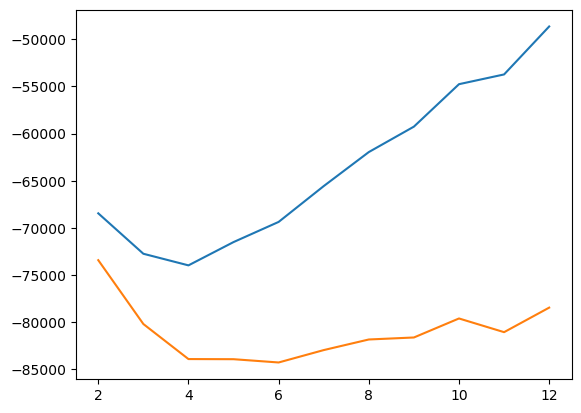

In [105]:
bic=[]
aic=[]
for i in range(2,13):
    EM1=GaussianMixture(n_components=i)
    EM1.fit(goalprog2)
    bic.append(EM1.bic(goalprog2))
    aic.append(EM1.aic(goalprog2))

plt.plot(range(2,13),bic,label='BIC')
plt.plot(range(2,13),aic,label='AIC')

In [109]:
bic=[]
aic=[]
for i in range(2,13):
    EM1=BayesianGaussianMixture(n_components=i)
    EM1.fit(goalprog2)
    bic.append(EM1.bic(goalprog2))
    aic.append(EM1.aic(goalprog2))

plt.plot(range(2,13),bic,label='BIC')
plt.plot(range(2,13),aic,label='AIC')

AttributeError: 'BayesianGaussianMixture' object has no attribute 'bic'

In [108]:
EM1=BayesianGaussianMixture(n_components=4)
EM1.fit(goalprog2)

BayesianGaussianMixture(n_components=4)

In [112]:
EM1.get_params()

{'covariance_prior': None,
 'covariance_type': 'full',
 'degrees_of_freedom_prior': None,
 'init_params': 'kmeans',
 'max_iter': 100,
 'mean_precision_prior': None,
 'mean_prior': None,
 'n_components': 2,
 'n_init': 1,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weight_concentration_prior': None,
 'weight_concentration_prior_type': 'dirichlet_process'}

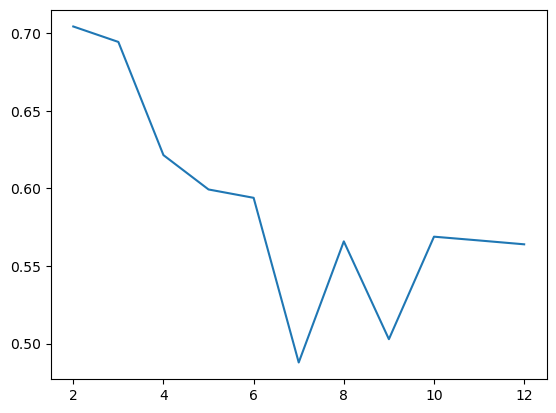

In [44]:
silhouette_score_list=[]
for i in range(2,13):
    EM1=GaussianMixture(n_components=i)
    silhouette_score_list.append(silhouette_score(goalprog2,EM1.fit_predict(goalprog2)))

plt.plot(range(2,13),silhouette_score_list)

In [45]:
EM

GaussianMixture(n_components=8)

In [46]:
goalprog3=goalprog2.copy()

In [47]:
goalprog3['clusters']=clusters

In [48]:
goalprog3=goalprog3.reset_index()

In [49]:
goal2=goal.merge(goalprog3[['user_id','clusters']],on='user_id',how='left')

In [115]:
log_likelihoods = []
bic_scores = []
aic_scores = []
data=goalprog2
K=range(2,15)
for k in K:
    model = BayesianGaussianMixture(n_components=k)
    model.fit(data)
    log_likelihood = model.score(data)
    log_likelihoods.append(log_likelihood)
    num_params = k * (k + 1) // 2  # Number of parameters for each cluster
    bic = -2 * log_likelihood + num_params * np.log(data.shape[0])
    bic_scores.append(bic)
    aic = -2 * log_likelihood + 2 * num_params
    aic_scores.append(aic)

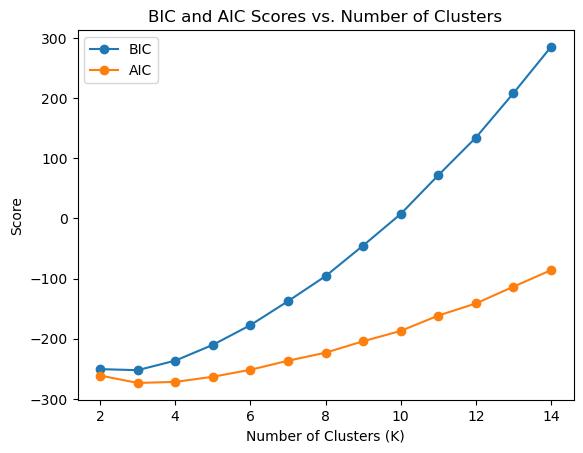

In [116]:
plt.plot(K, bic_scores, marker='o', label='BIC')
plt.plot(K, aic_scores, marker='o', label='AIC')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('BIC and AIC Scores vs. Number of Clusters')
plt.legend()

Text(0, 0.5, 'Mastery level')

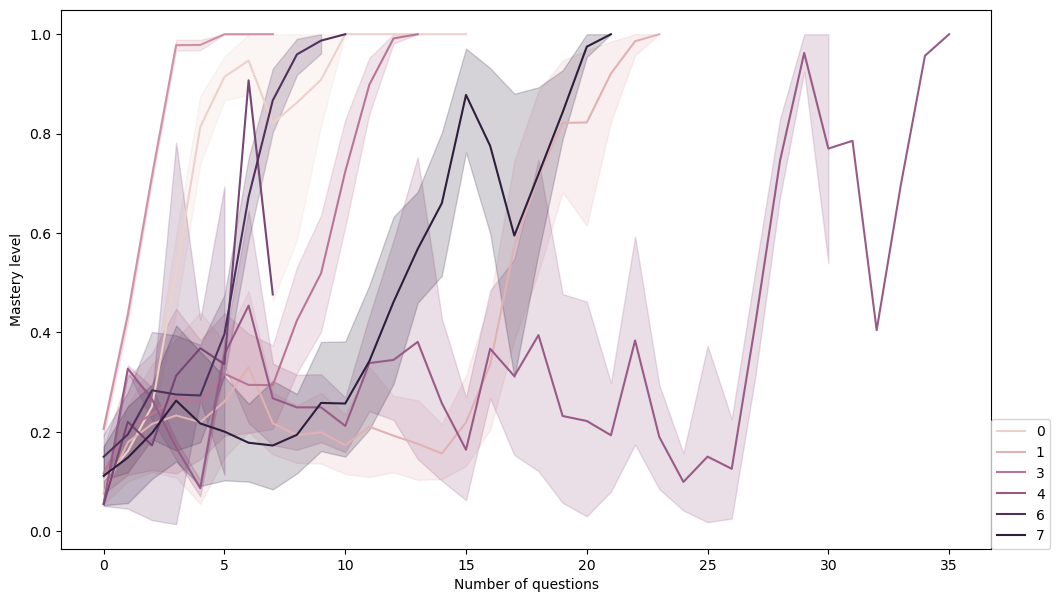

In [50]:
plt.figure(figsize=(12,7))
sns.lineplot(data=goal2,x='row',y='goal_progress',hue='clusters')
plt.legend(loc=(1,0))
plt.xlabel('Number of questions')
plt.ylabel('Mastery level')

In [51]:
EM.weights_

array([0.14229247, 0.04347826, 0.62450595, 0.05533597, 0.01581028,
       0.01185771, 0.06719368, 0.03952569])

In [52]:
colors = plt.cm.tab20.colors
colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.74117647

In [53]:
goal2['color']=goal2.clusters.apply(lambda x: colors[x])

In [54]:
users=list(goal2.user_id.unique())
clusters=sorted(list(goal2.clusters.unique()))

In [55]:
len(users)

253

In [56]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=i, lw=2) for i in colors]


Text(0, 0.5, 'Mastery level')

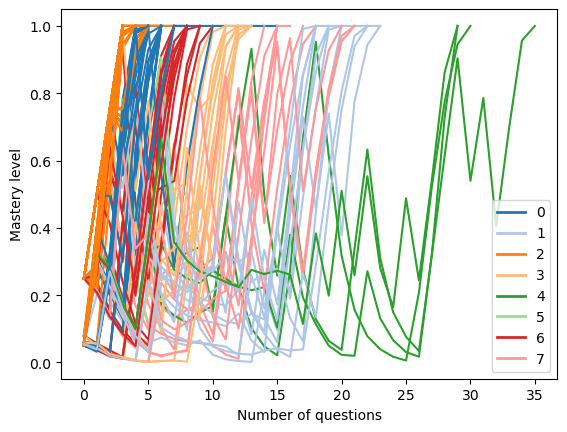

In [57]:
for user in users:
    goaltemp=goal2[goal2.user_id==user]
    plt.plot(goaltemp.row,goaltemp.goal_progress,color=goaltemp.color.unique()[0])
plt.legend(custom_lines,clusters)
plt.xlabel('Number of questions')
plt.ylabel('Mastery level')

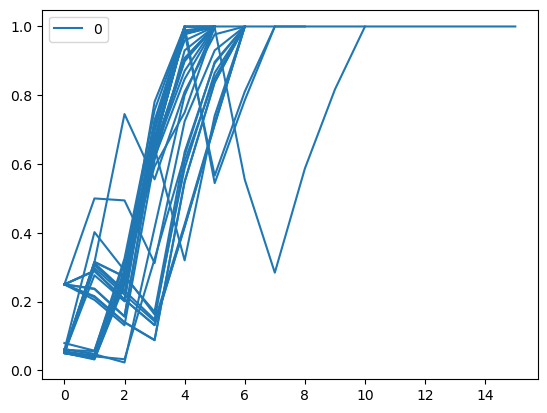

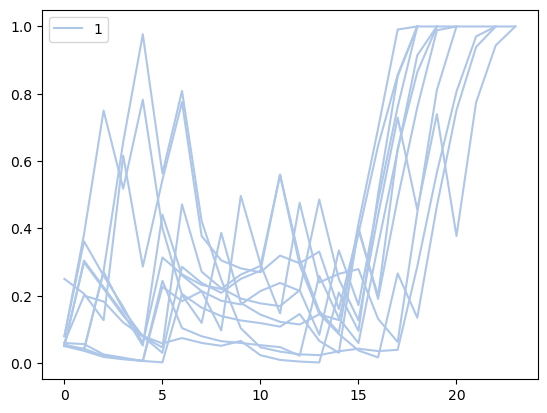

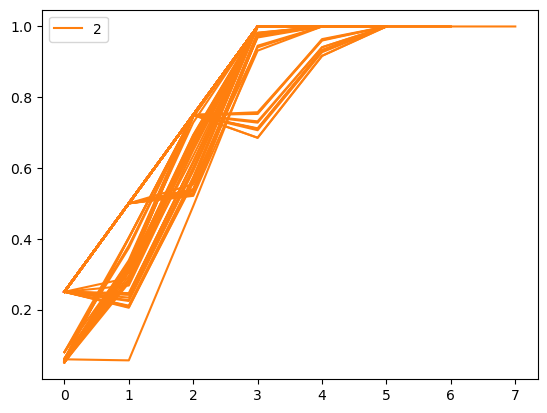

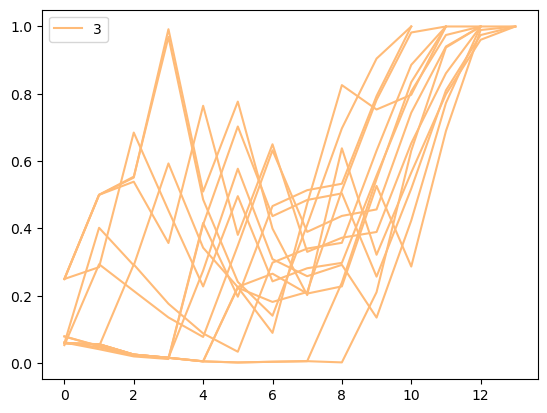

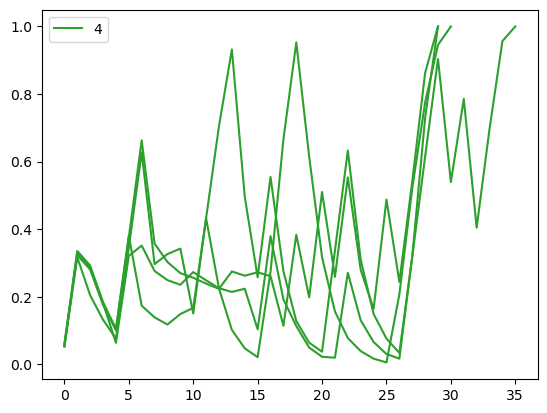

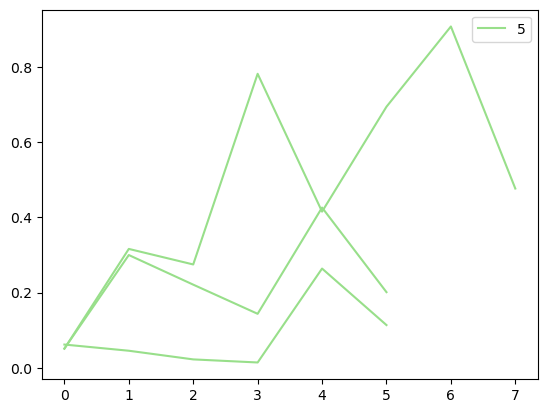

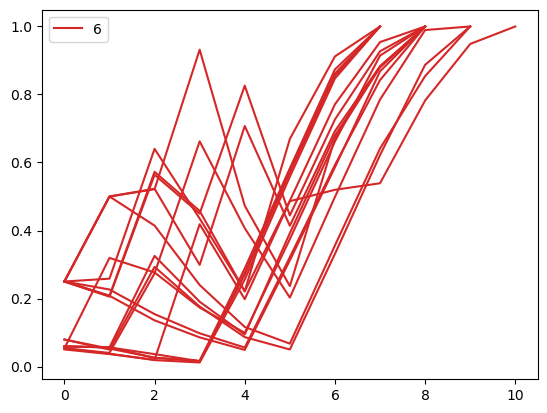

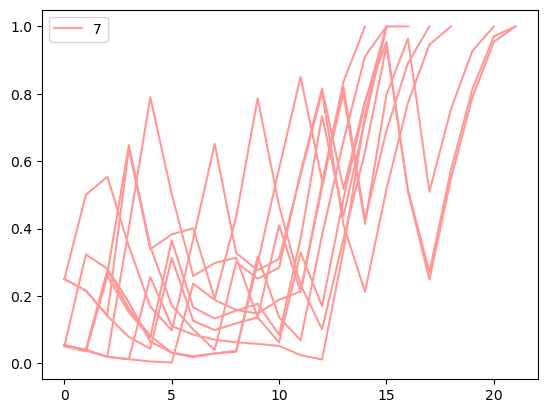

In [58]:
for c in clusters:

    fig,ax=plt.subplots()
    for user in users:
        goaltemp=goal2[(goal2.user_id==user) & (goal2.clusters==c)]
        ax.plot(goaltemp.row,goaltemp.goal_progress,color=colors[c])
    ax.legend([c])

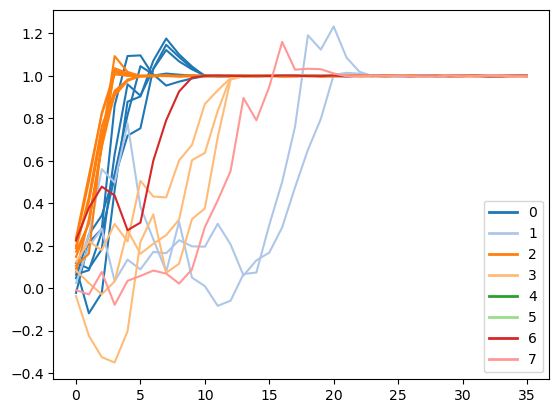

In [59]:
n=20
samples=EM.sample(n)
for clus in range(n):
    plt.plot(samples[0][clus],label=samples[1][clus],color=colors[samples[1][clus]])
plt.legend(custom_lines,clusters)

<AxesSubplot:xlabel='correct', ylabel='duration_s'>

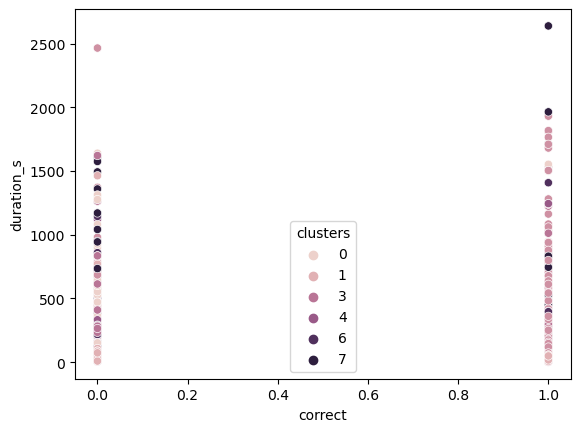

In [60]:
sns.scatterplot(data=goal2,y='duration_s',x='correct',hue='clusters')

In [61]:
x=np.linspace(.05,1,36)


In [62]:
clsn=6

In [63]:
cov=EM.covariances_[clsn]
std=[]
for i in range(36):
    std.append(np.sqrt(cov[i][i]))

In [64]:
means=EM.means_[clsn]

In [65]:
upperbound=[]
lowerbound=[]
for i in range(36):
    upperbound.append(means[i]+std[i]*1.96)
    lowerbound.append(means[i]-std[i]*1.96)

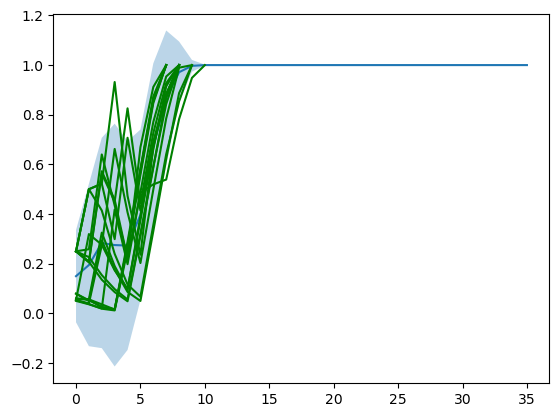

In [66]:
plt.plot(means)
plt.fill_between(np.arange(0,36),lowerbound,upperbound,alpha=.3)
for user in users:
    goaltemp=goal2[(goal2.user_id==user) & (goal2.clusters==clsn)]
    plt.plot(goaltemp.row,goaltemp.goal_progress,color='green')


Text(0, 0.5, 'Mastery level')

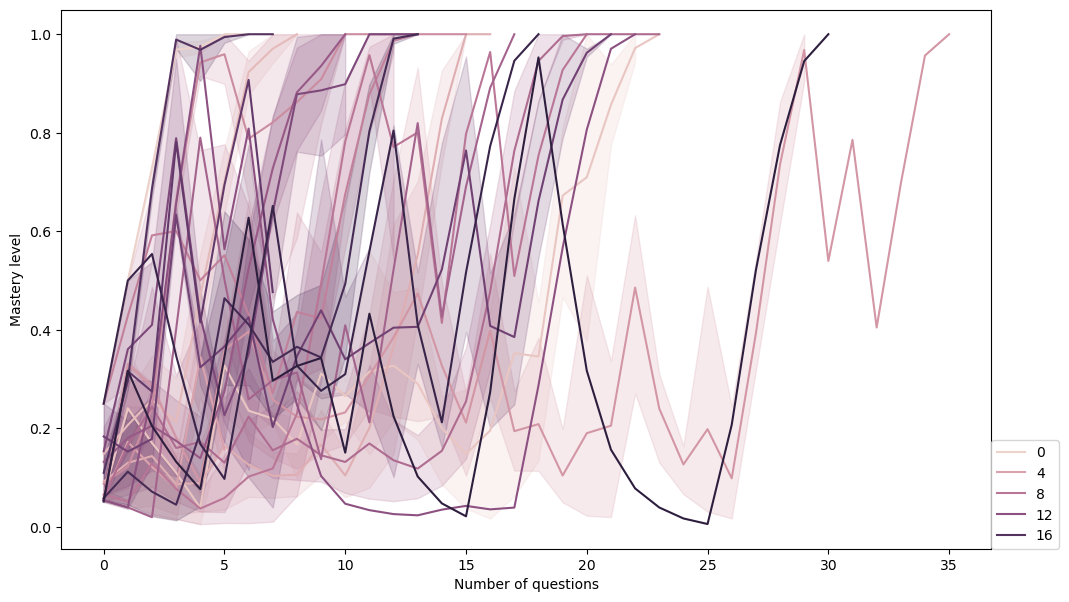

In [67]:



# generate some random data


# fit Dirichlet clustering
dpgmm = BayesianGaussianMixture(n_components=20, random_state=0,tol=.5).fit(goalprog2)

# predict clusters for the data points
labels = dpgmm.predict(goalprog2)

# print the cluster assignments

goalprog4=goalprog2.copy()
goalprog4['clusters']=labels
goalprog4=goalprog4.reset_index()
goal3=goal.merge(goalprog4[['user_id','clusters']],on='user_id',how='left')
plt.figure(figsize=(12,7))
sns.lineplot(data=goal3,x='row',y='goal_progress',hue='clusters')
plt.legend(loc=(1,0))
plt.xlabel('Number of questions')
plt.ylabel('Mastery level')

Text(0, 0.5, 'Mastery level')

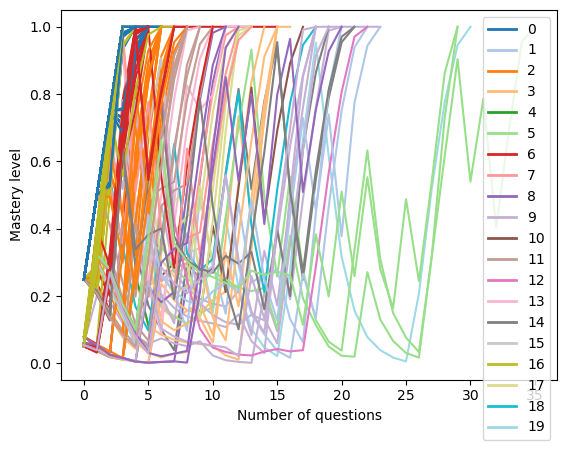

In [68]:
goal3['color']=goal3.clusters.apply(lambda x: colors[x])

users=list(goal3.user_id.unique())
clusters=sorted(list(goal3.clusters.unique()))

len(users)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=i, lw=2) for i in colors]


for user in users:
    goaltemp=goal3[goal3.user_id==user]
    plt.plot(goaltemp.row,goaltemp.goal_progress,color=goaltemp.color.unique()[0])
plt.legend(custom_lines,clusters)
plt.xlabel('Number of questions')
plt.ylabel('Mastery level')

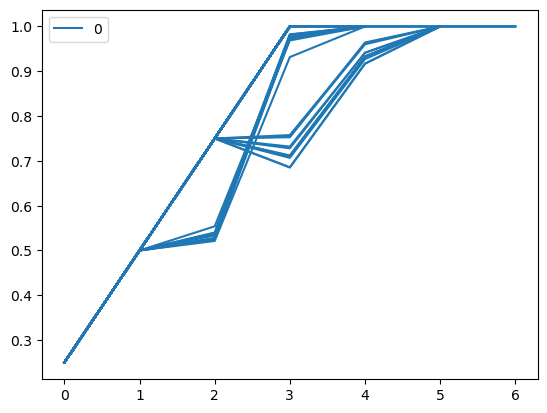

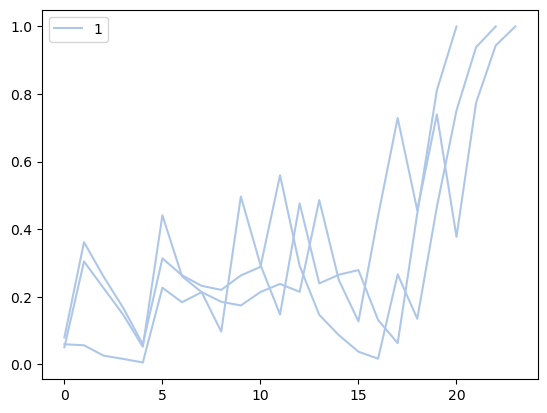

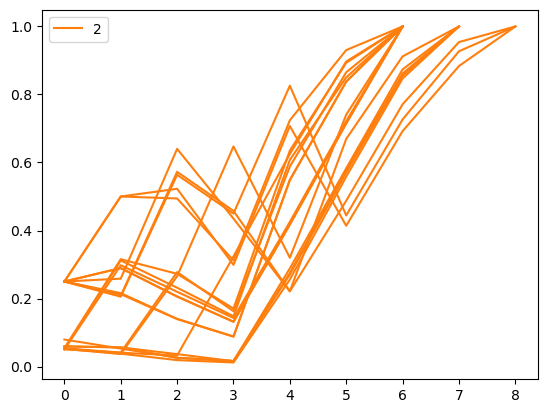

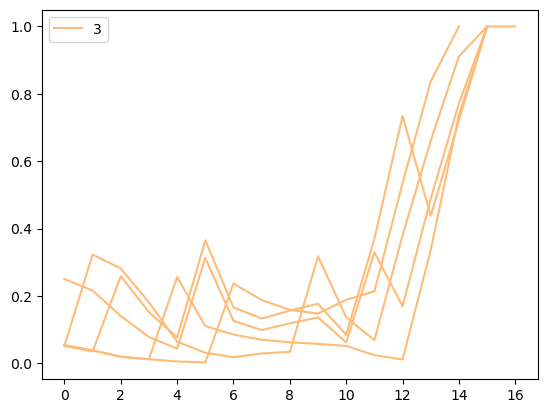

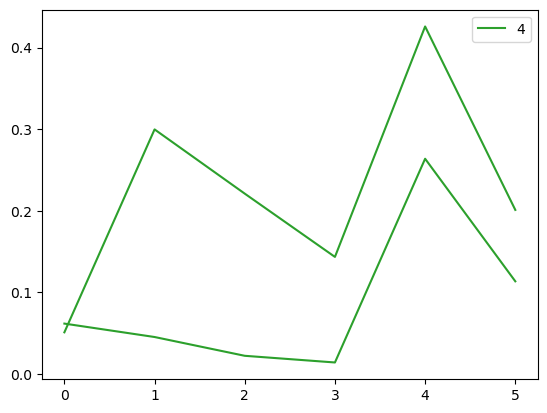

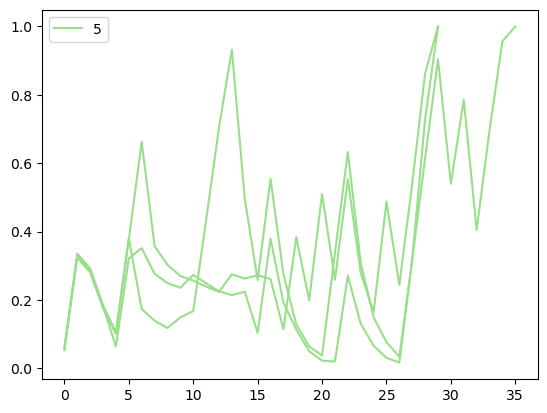

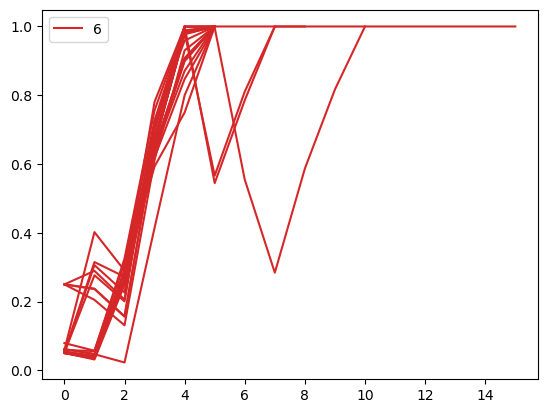

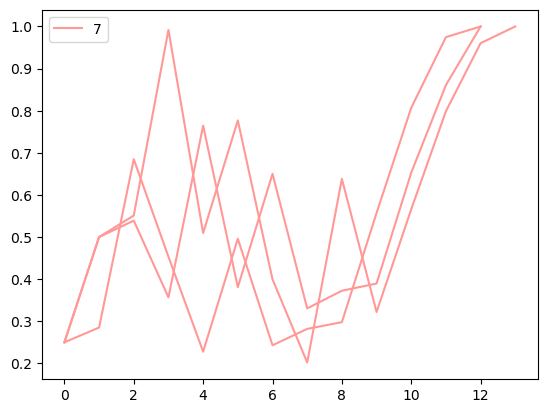

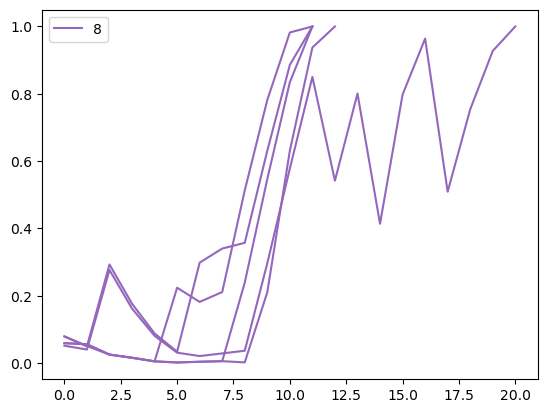

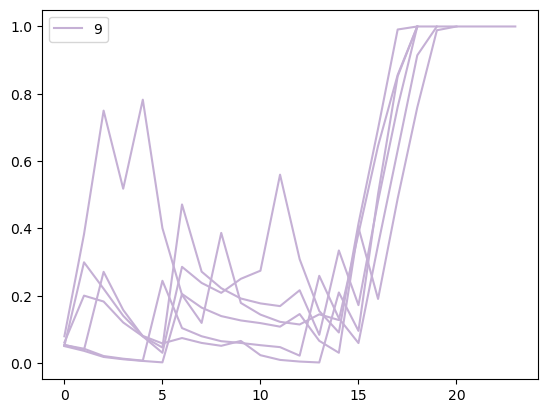

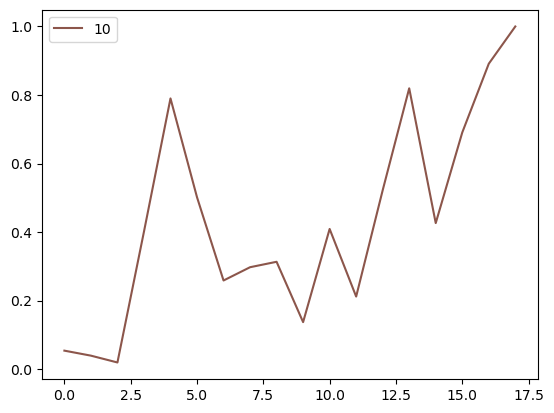

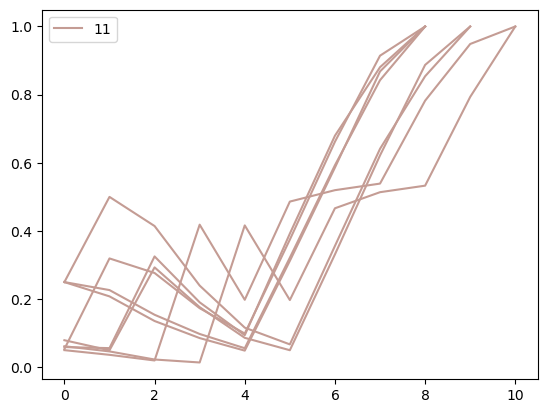

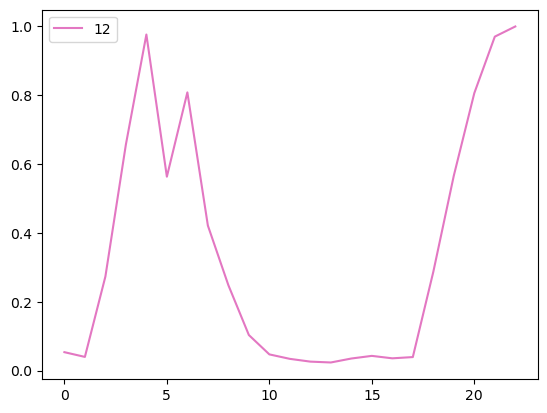

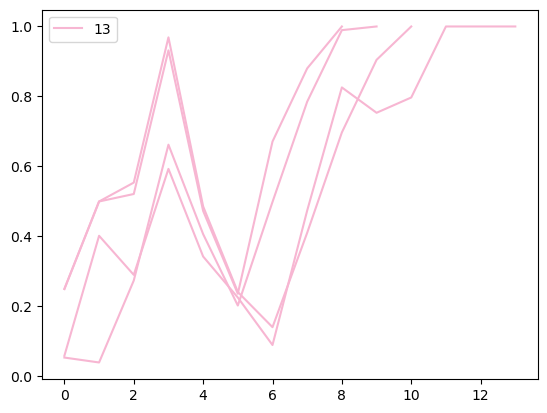

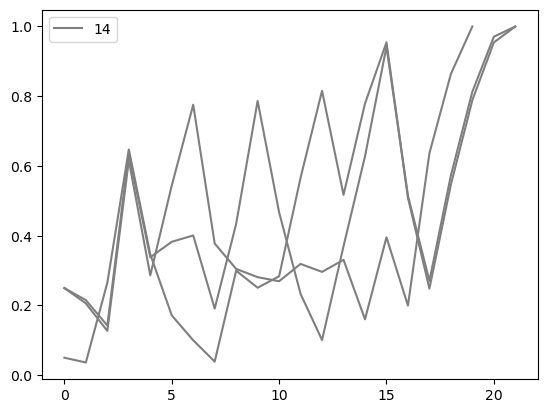

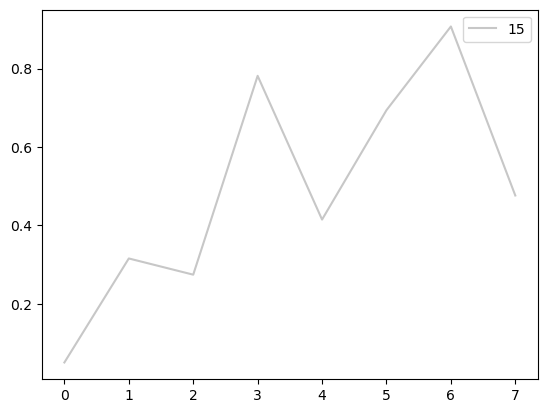

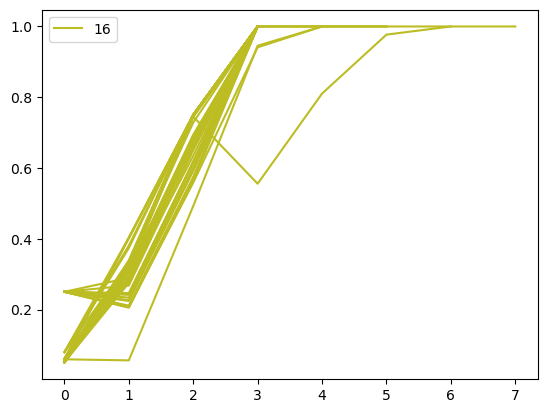

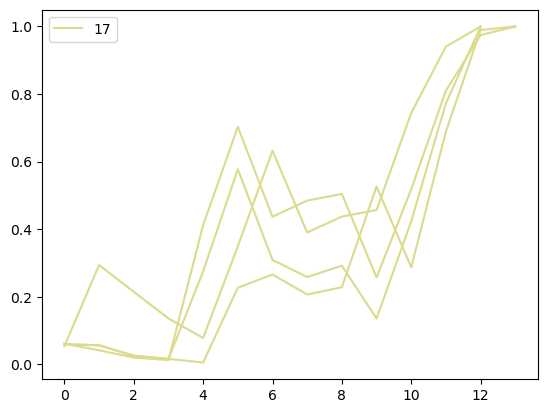

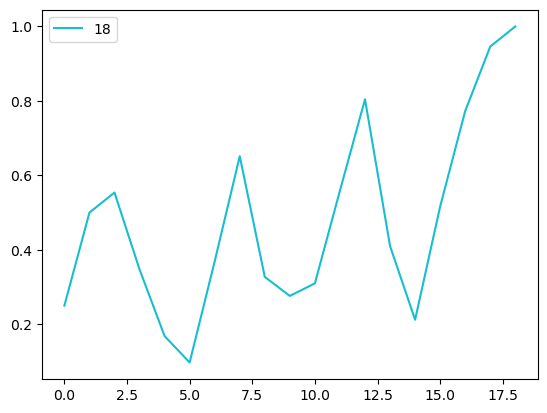

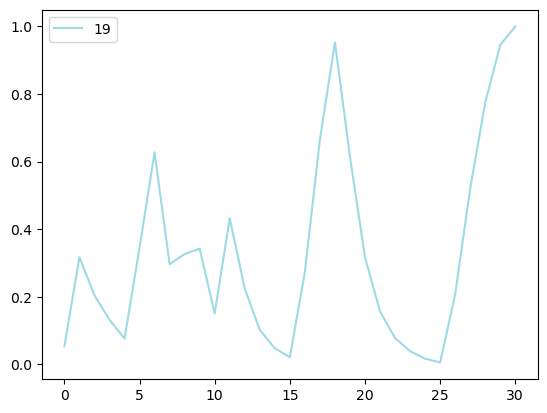

In [69]:
for c in clusters:

    fig,ax=plt.subplots()
    for user in users:
        goaltemp=goal3[(goal3.user_id==user) & (goal3.clusters==c)]
        ax.plot(goaltemp.row,goaltemp.goal_progress,color=colors[c])
    ax.legend([c])

In [70]:
#goalprog.to_csv('goalprog.csv')

In [71]:
models={}
modelNum=0
for m,c in zip(EM.means_,EM.covariances_):
    models[modelNum]=multivariate_normal(m,c)
    modelNum +=1

for i in range(9):    
    print(models[i].pdf(x))

In [72]:
temp=df2.pivot_table(values='loGraphID',index='goal_id',aggfunc=pd.Series.nunique)

In [73]:
goalprog3.iloc[0,1:-1].values

array([0.06178312175, 0.3391303411, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       1.0], dtype=object)

In [74]:
goalprog3

user_id         0         1         2  \
0    019f8b21-1059-4962-9cbc-70a978d14a79  0.061783  0.339130  0.750000   
1    023fc528-8b33-4431-8cb7-52f8fe00d422  0.250000  0.500000  0.750000   
2    02f57a11-9262-4fde-98e5-e28b0bfb2d3f  0.250000  0.500000  0.750000   
3    038d85a1-75f0-417b-b1a4-d443de4fb8d3  0.053331  0.317057  0.204677   
4    04237b29-88fb-4e99-9f09-d64c9690f065  0.250000  0.500000  0.750000   
..                                    ...       ...       ...       ...   
248  f8e12831-2ab5-4c79-a615-e4c910bd9cfe  0.250000  0.500000  0.750000   
249  fa269e7f-b13f-41b2-9184-06c31fafaa7b  0.050282  0.039018  0.273064   
250  fc5d1c10-077c-4bfb-9cc9-6c7cde6d3a5f  0.050282  0.309929  0.658005   
251  fd134dd2-72b2-4c78-9174-4cc6ceedd393  0.250000  0.500000  0.750000   
252  fdd43067-8995-4296-b924-2a24b934b0dd  0.054074  0.038985  0.270938   

            3         4         5         6         7         8         9  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3    0.132145  0.076365  0.345103  0.627507  0.296672  0.326561  0.342671   
4    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
249  0.657478  0.977327  1.000000  1.000000  1.000000  1.000000  1.000000   
250  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
251  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
252  0.157661  0.079130  0.030331  0.285717  0.237976  0.208511  0.250148   

           10        11        12        13        14        15        16  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
3    0.150558  0.432636  0.224559  0.102123  0.047603  0.021389  0.273703   
4    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
249  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
250  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
251  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
252  0.274292  0.559661  0.308536  0.154538  0.090674  0.414086  0.696298   

           17       18        19        20        21        22        23  \
0    1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
2    1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
3    0.665538  0.95288  0.614857  0.316913  0.156691  0.077989  0.039285   
4    1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
..        ...      ...       ...       ...       ...       ...       ...   
248  1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
249  1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
250  1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
251  1.000000  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   
252  0.991008  1.00000  1.000000  1.000000  1.000000  1.000000  1.000000   

           24        25        26        27        28        29   30   31  \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0   
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0   
2    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0  1.0   
3    0.017002  0.005713  0.207175  0.520882  0.775178  0.94549

In [75]:
mvn=multivariate_normal(EM.means_[0],EM.covariances_[0])
mvn.pdf(goalprog3.iloc[250:,1:-1].values)

array([8.32444265e+73, 2.07370950e+70, 0.00000000e+00])

In [76]:
x=np.random.uniform(0,1,(100,36))

In [77]:
y=mvn.pdf(goalprog3.iloc[:,1:-1].values)

In [78]:
#plt.contour(x, np.sort(X[:,1]), multi_normal.pdf(XY).reshape(len(X), len(X)), colors='black', alpha=0.3)

NameError: name 'X' is not defined

In [79]:
#mvn.pdf(XY)

NameError: name 'XY' is not defined

In [80]:
km=KMeans(n_clusters=9)

In [81]:
clusLabel=km.fit_predict(goalprog2)

C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [82]:
goalprog4=goalprog2.copy().reset_index()

In [83]:
goalprog4['cluster']=clusLabel

In [84]:
goal3=goal.copy()

In [85]:
goal3=goal.merge(goalprog4[['user_id','cluster']],on='user_id',how='left')


In [86]:
goal3['color']=goal3.cluster.apply(lambda x: colors[x])

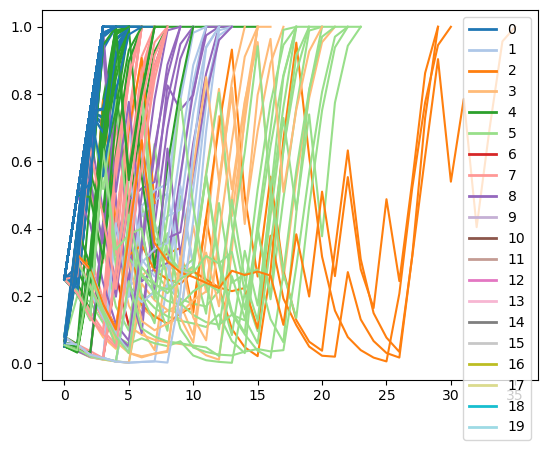

In [87]:
for user in users:
    goaltemp=goal3[goal3.user_id==user]
    plt.plot(goaltemp.row,goaltemp.goal_progress,color=goaltemp.color.unique()[0])
plt.legend(custom_lines,clusters)

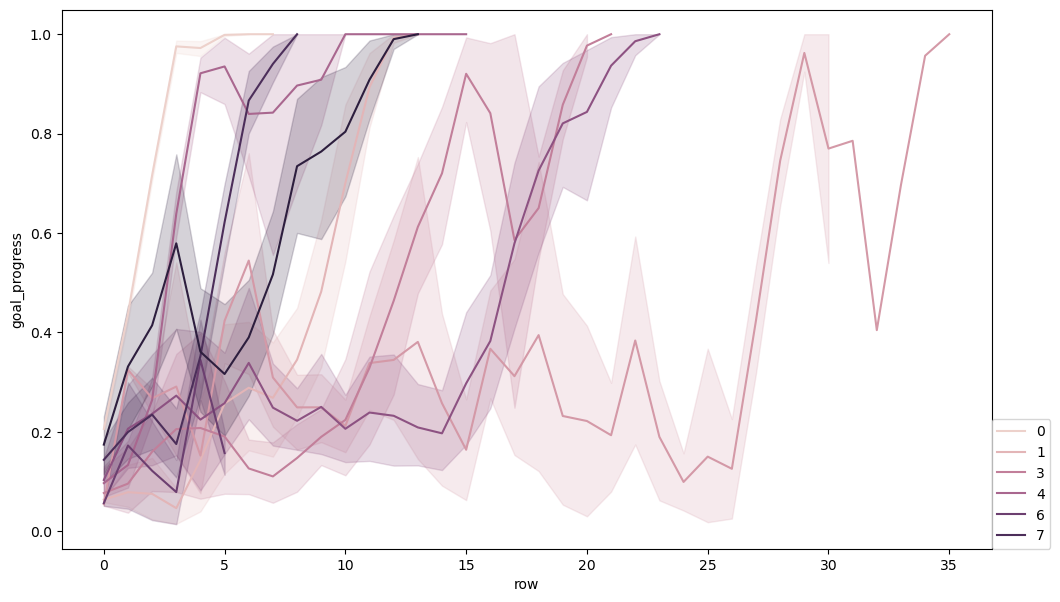

In [88]:
plt.figure(figsize=(12,7))
sns.lineplot(data=goal3,x='row',y='goal_progress',hue='cluster')
plt.legend(loc=(1,0))

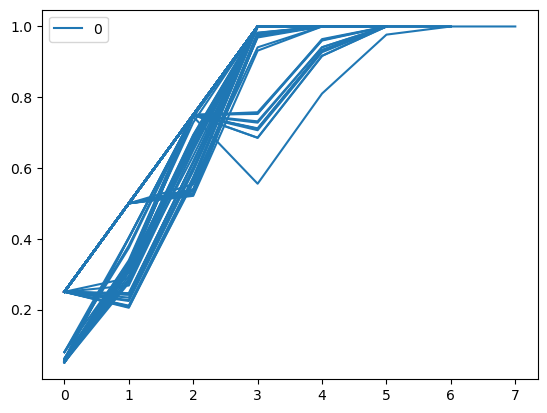

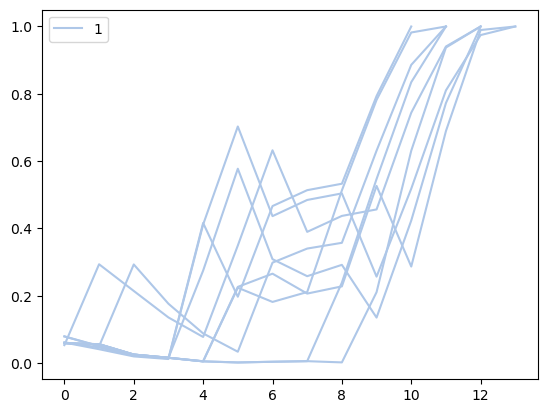

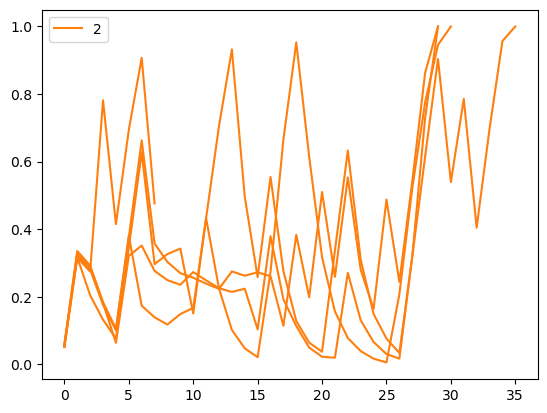

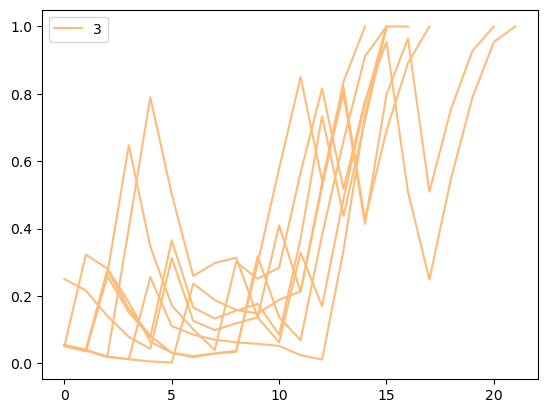

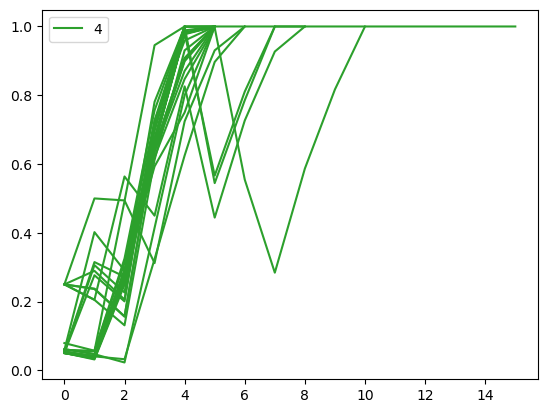

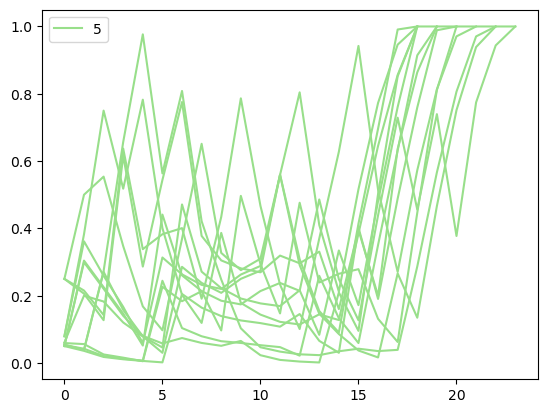

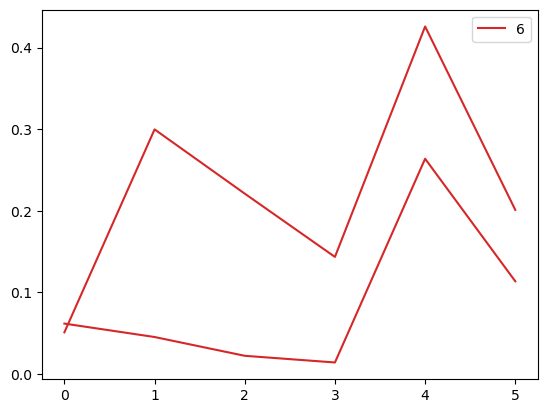

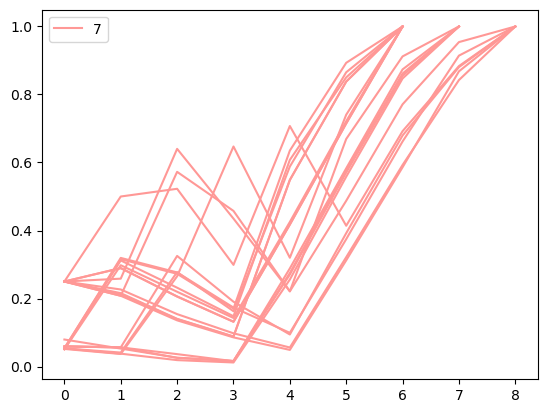

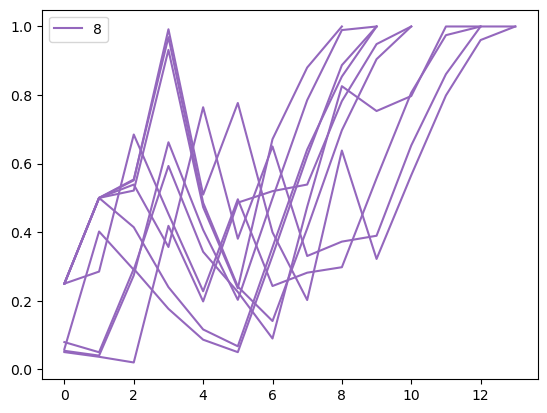

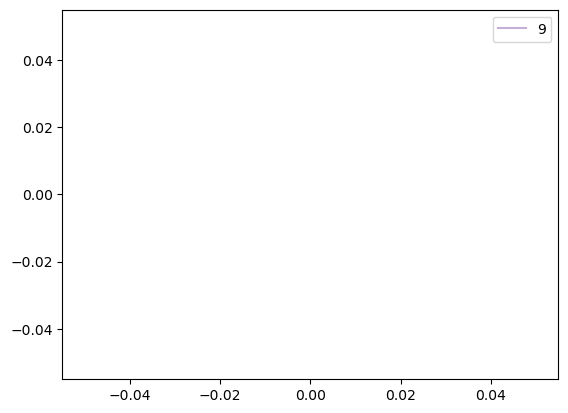

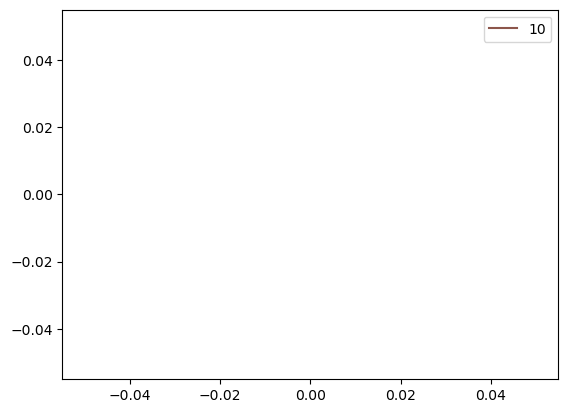

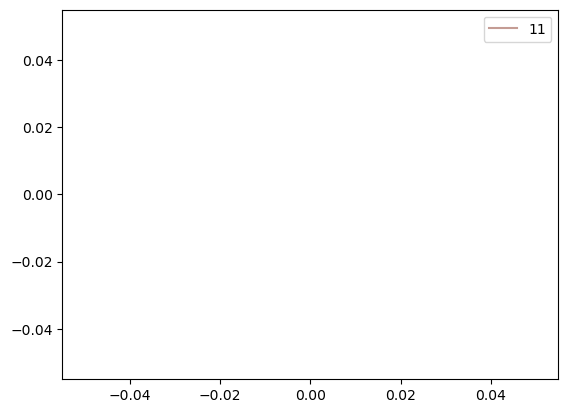

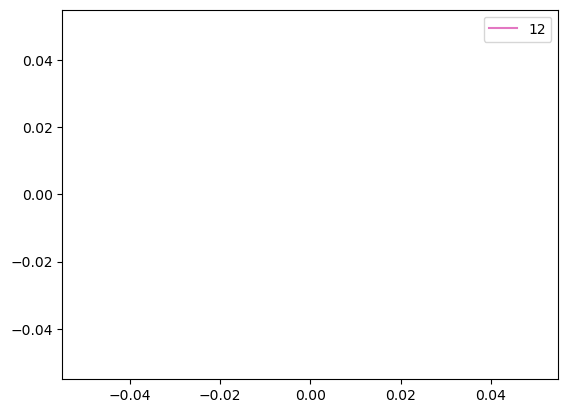

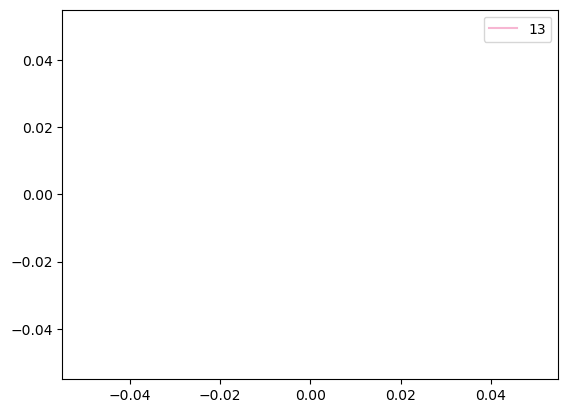

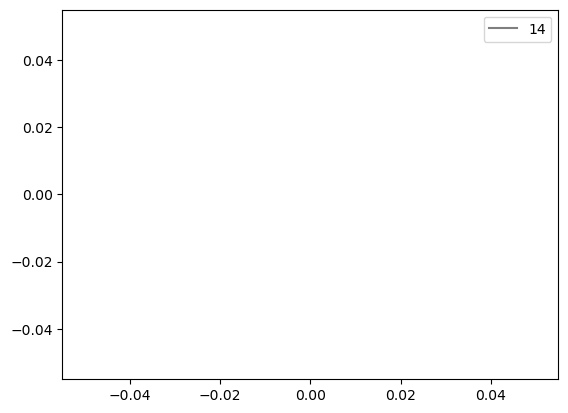

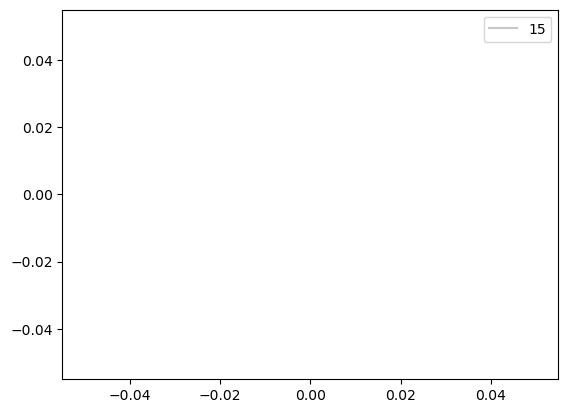

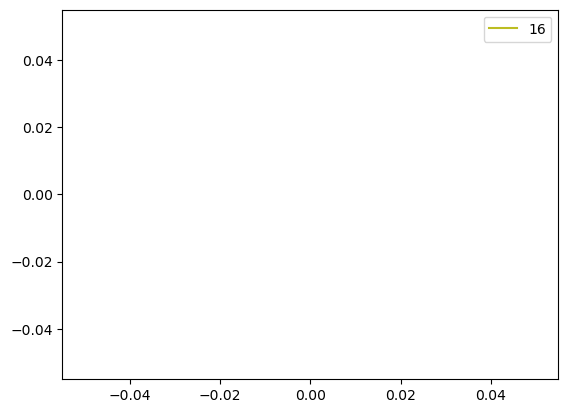

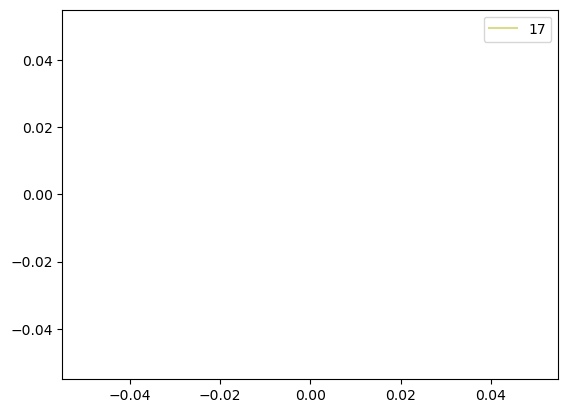

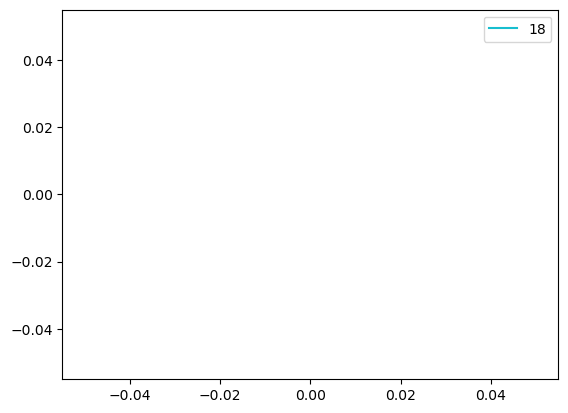

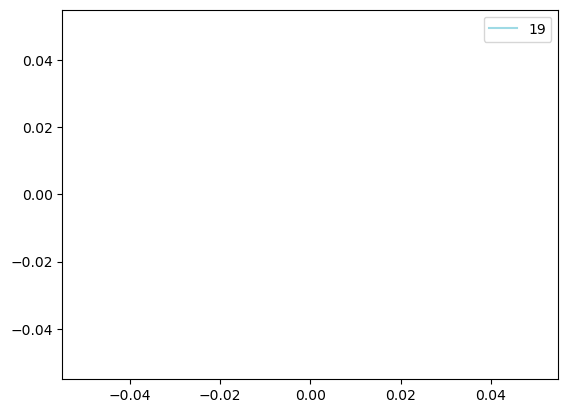

In [89]:
for c in clusters:

    fig,ax=plt.subplots()
    for user in users:
        goaltemp=goal3[(goal3.user_id==user) & (goal3.cluster==c)]
        ax.plot(goaltemp.row,goaltemp.goal_progress,color=colors[c])
    ax.legend([c])

C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mpathirana\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mpathirana\Anaconda3\lib\si

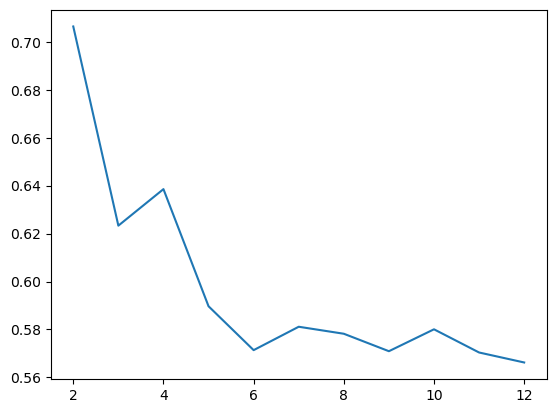

In [90]:
silhouette_score_list_km=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    silhouette_score_list_km.append(silhouette_score(goalprog2,km.fit_predict(goalprog2)))

plt.plot(range(2,13),silhouette_score_list_km)

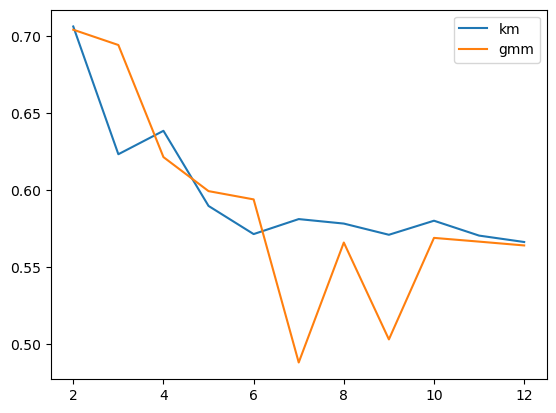

In [91]:
plt.plot(range(2,13),silhouette_score_list_km,label='km')
plt.plot(range(2,13),silhouette_score_list,label='gmm')
plt.legend()


In [92]:
silhouette_score(goalprog2.values,clusters)

ValueError: Found input variables with inconsistent numbers of samples: [253, 20]

In [ ]:
silhouette_score(goalprog2.values,clusLabel)

In [ ]:
subdf=df2[df2.loGraphID==16]

In [ ]:
subdf.user_id.nunique()

In [ ]:
subdf.goal_id.nunique()

In [ ]:
subdf.registration_id.nunique()

In [ ]:
subdf.groupby('user_id').goal_progress.max().plot(kind='hist')

In [ ]:
subdf.atom_id=subdf.atom_id.astype(str)

In [ ]:
subdf.correct=subdf.correct.fillna(-1)
subdf.correct.dtype

In [ ]:
subdf.correct=subdf.correct.replace({True:1,False:0})

In [ ]:
len(subdf[subdf.correct!=-1].atom_id.unique())

In [ ]:
len(subdf[subdf.correct==-1].atom_id.unique())

In [ ]:
subdfAtom=subdf[subdf.correct!=-1]

In [ ]:
subdfAtom.learning_objective_name=subdfAtom.learning_objective_name.astype(str)
subdfAtom.user_id=subdfAtom.user_id.astype(str)

In [ ]:
subdfAtom.head(3)

In [ ]:
subdfAtomPvt=subdfAtom.pivot_table(index=['user_id','learning_objective_name'],aggfunc={'correct':['count',np.sum]})

In [ ]:
subdfAtomPvt

In [ ]:
subdfAtomPvt.columns=[subdfAtomPvt.columns[0][1],subdfAtomPvt.columns[1][1]]

In [ ]:
subdfAtomPvt=subdfAtomPvt.reset_index()

In [ ]:
subdfAtomPvt['correctPct']=subdfAtomPvt['sum']*100/subdfAtomPvt['count']

In [ ]:
sns.boxplot(subdfAtomPvt,x='learning_objective_name',y='correctPct')
plt.xticks(rotation=10);

In [ ]:
sns.ecdfplot(subdfAtomPvt,x='correctPct',hue='learning_objective_name')

In [ ]:
subdfAtomPvt2=subdfAtomPvt.pivot_table(index='user_id',columns='learning_objective_name',values='correctPct').reset_index()

In [ ]:
subdfAtomPvt2

In [ ]:
sns.heatmap(subdfAtomPvt2.corr(),annot=True)

In [ ]:
sns.pairplot(subdfAtomPvt2)

In [ ]:
sampleUser=df2[df2.user_id=='ffd3b5cb-2abd-439e-8b48-08e143046fbc']

In [ ]:
los='Evaluate limits analytically for piecewise functions'

In [ ]:
df[(df.source_lo_title==los) | (df.dest_lo_title==los)]

In [ ]:
loDf=df2[df2.learning_objective_name.isin(df[(df.source_lo_title==los) | (df.dest_lo_title==los)].source_lo_title) | df2.learning_objective_name.isin(df[(df.source_lo_title==los) | (df.dest_lo_title==los)].dest_lo_title)]

In [ ]:
loDf.user_id.unique()

In [ ]:
loDf[loDf.user_id=='ffe83e9a-cbc8-4079-acf1-d65e014f5002'].plot('interaction_end_time','goal_progress')

In [ ]:
loDf.learning_objective_name=loDf.learning_objective_name.astype(str)

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=loDf[loDf.user_id=='ffe83e9a-cbc8-4079-acf1-d65e014f5002'],x='interaction_end_time',y='goal_progress',hue='learning_objective_name')

In [ ]:
loDf.columns

In [ ]:
#loDf[loDf.user_id=='ffe83e9a-cbc8-4079-acf1-d65e014f5002']

In [ ]:
loDf.learning_objective_name.unique()

In [ ]:
#lodfpivt=loDf.pivot_table(index='user_id',columns=['learning_objective_name','atom_id'],values='correct')

In [ ]:
lodfpivt=loDf[(loDf.learning_objective_name=='Evaluate limits analytically for piecewise functions') & (~loDf.correct.isna())].pivot_table(index='user_id',columns='atom_id',values='correct')

In [ ]:
sns.heatmap(lodfpivt.iloc[:30],cmap='crest_r')